In [64]:
import numpy as np
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential

In [65]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3

In [66]:
def data_preparation(timeseries_data, steps):
    X,y = [],[]
    len_data = len(timeseries_data)
    for i in range(len_data):
        end = i + steps
        if end > len_data-1:
            break
        x_data, y_data = timeseries_data[i:end], timeseries_data[end]
        X.append(x_data)
        y.append(y_data)
    return np.array(X),np.array(y) 

In [67]:
n_steps= 3
X,y = data_preparation(timeseries_data, n_steps)

In [68]:
print(X)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [69]:
print(y)

[146 158 172 187 196 210]


In [70]:
X.shape

(6, 3)

In [71]:
# for the timeseries data, data should be an 3D data so we will be adding one additional dimension
n_feature = 1
X = X.reshape((X.shape[0], X.shape[1], n_feature))

In [72]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (n_steps, n_feature)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [73]:
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 31486.8809
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 30043.9746
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 28386.9316
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 27288.2188
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 26393.7793
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 25369.1738
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 24181.6328
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 22906.8145
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 21803.5801
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 20898.4766
Epoch 11/300
1/1 [==============================] - 0s 11ms/step - loss: 20050.5352
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 19174.1523
Epoch 13/300


1/1 [==============================] - 0s 999us/step - loss: 4.9238
Epoch 103/300
1/1 [==============================] - 0s 7ms/step - loss: 4.8673
Epoch 104/300
1/1 [==============================] - 0s 6ms/step - loss: 4.5322
Epoch 105/300
1/1 [==============================] - 0s 4ms/step - loss: 4.7004
Epoch 106/300
1/1 [==============================] - 0s 5ms/step - loss: 4.3100
Epoch 107/300
1/1 [==============================] - 0s 10ms/step - loss: 4.4645
Epoch 108/300
1/1 [==============================] - 0s 8ms/step - loss: 4.0879
Epoch 109/300
1/1 [==============================] - 0s 15ms/step - loss: 4.3419
Epoch 110/300
1/1 [==============================] - 0s 8ms/step - loss: 3.9833
Epoch 111/300
1/1 [==============================] - 0s 10ms/step - loss: 4.0784
Epoch 112/300
1/1 [==============================] - 0s 11ms/step - loss: 3.8980
Epoch 113/300
1/1 [==============================] - 0s 7ms/step - loss: 3.9543
Epoch 114/300
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 2.3555
Epoch 205/300
1/1 [==============================] - 0s 9ms/step - loss: 2.3398
Epoch 206/300
1/1 [==============================] - 0s 11ms/step - loss: 2.3682
Epoch 207/300
1/1 [==============================] - 0s 9ms/step - loss: 2.4005
Epoch 208/300
1/1 [==============================] - 0s 9ms/step - loss: 2.4084
Epoch 209/300
1/1 [==============================] - 0s 6ms/step - loss: 2.3720
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 2.3166
Epoch 211/300
1/1 [==============================] - 0s 7ms/step - loss: 2.2651
Epoch 212/300
1/1 [==============================] - 0s 10ms/step - loss: 2.2341
Epoch 213/300
1/1 [==============================] - 0s 11ms/step - loss: 2.2231
Epoch 214/300
1/1 [==============================] - 0s 8ms/step - loss: 2.2301
Epoch 215/300
1/1 [==============================] - 0s 11ms/step - loss: 2.2505
Epoch 216/300
1/1 [==============================]

In [78]:
x_input = np.array([187, 196, 210])
n_features = 1
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print(x_input)
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        print(temp_input)
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.append(yhat[0][0])
        print(lst_output)
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

221.09236
[196.         210.         221.09236145]
1 day input [196.         210.         221.09236145]
[[231.46442]]
1 day output [[231.46442]]
[187, 196, 210, 221.09236, 231.46442]
[196, 210, 221.09236, 231.46442]
[221.09236, 231.46442]
[210.         221.09236145 231.4644165 ]
2 day input [210.         221.09236145 231.4644165 ]
[[243.44917]]
2 day output [[243.44917]]
[196, 210, 221.09236, 231.46442, 243.44917]
[210, 221.09236, 231.46442, 243.44917]
[221.09236, 231.46442, 243.44917]
[221.09236 231.46442 243.44917]
3 day input [221.09236 231.46442 243.44917]
[[253.99648]]
3 day output [[253.99648]]
[210, 221.09236, 231.46442, 243.44917, 253.99648]
[221.09236, 231.46442, 243.44917, 253.99648]
[221.09236, 231.46442, 243.44917, 253.99648]
[231.46442 243.44917 253.99648]
4 day input [231.46442 243.44917 253.99648]
[[264.67828]]
4 day output [[264.67828]]
[221.09236, 231.46442, 243.44917, 253.99648, 264.67828]
[231.46442, 243.44917, 253.99648, 264.67828]
[221.09236, 231.46442, 243.44917, 

In [79]:
lst_output

[221.09236,
 231.46442,
 243.44917,
 253.99648,
 264.67828,
 275.82516,
 286.394,
 297.19327,
 308.16,
 318.99008]

In [81]:
import matplotlib.pyplot as plt

In [82]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

print(day_new)
print(day_pred)

[1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


Text(0.5, 1.0, 'Time Series data')

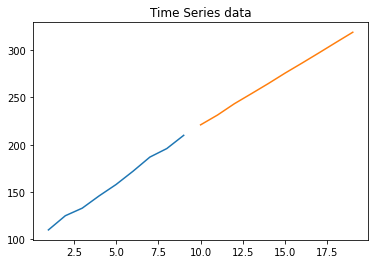

In [89]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)
plt.title("Time Series data")